# FreeSurfer: recon-all-clinical

This notebook was prepared for an audience of clinicians at the 2025 [PACTALS conference](https://www.pactalscongress.com/programme) (Pan-Asian consortium of Treatment and Research in ALS) in Melbourne.

####

**Author:** Thomas Shaw, 1 Sept 2025  

[<img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="30"> thomshaw92](https://github.com/thomshaw92 )

[<img src="https://info.orcid.org/wp-content/uploads/2019/11/orcid_16x16.png" width="25"> 0000-0003-2490-0532](https://orcid.org/0000-0003-2490-0532)

### Citations and Resources:
#### Tools included in this workflow
__recon-all-clinical__: 
- Karthik Gopinath, Douglas N. Greve, Colin Magdamo, Steve Arnold, Sudeshna Das, Oula Puonti, Juan Eugenio Iglesias,
“Recon-all-clinical”: Cortical surface reconstruction and analysis of heterogeneous clinical brain MRI, Medical Image Analysis, Volume 103, 2025, 103608, ISSN 1361-8415, [https://doi.org/10.1016/j.media.2025.103608](https://doi.org/10.1016/j.media.2025.103608).

#### Dataset: 
__T1 weighted MP2RAGE at 7T (healthy control)__

- Shaw TB, York A, Barth M, Bollmann S. Towards Optimising MRI Characterisation of Tissue (TOMCAT) Dataset including all Longitudinal Automatic Segmentation of Hippocampal Subfields (LASHiS) data. Data Brief. 2020 Jul 20;32:106043. doi: [https://doi.org/10.1016/j.dib.2020.106043](https://doi.org/10.1016/j.dib.2020.106043) PMID: 32793772; PMCID: PMC7415822.

## General Instructions:

<div style="
    border:2px solid #1976D2; 
    border-radius:10px; 
    padding:20px; 
    background-color: var(--jp-cell-bg0, #E3F2FD);
">

<h2 style="color:#1976D2;">📘 How to Use This Notebook</h2>

<p style="color: var(--jp-ui-font-color0, #0D47A1);">
This notebook is an <b style="color:#1976D2;">interactive document</b>.  
It mixes short explanations (like this box) with computer code that runs automatically.
</p>

<ul style="
    font-size:16px; 
    line-height:1.6; 
    color: var(--jp-ui-font-color1, #0D47A1); 
    list-style-type: disc; 
    padding-left: 25px; 
    list-style-position: inside;
">
  <li>👆 <b>Click on a cell</b> (the boxes with text or code)</li>
  <li>▶️ <b>Run it</b> by pressing <code>Command + Enter</code> (Mac) or <code>Control + Enter</code> (Windows/Linux)</li>
  <li>⏭️ Or use the <b>play button</b> in the toolbar above</li>
  <li>⬇️ Move to the next cell and repeat</li>
</ul>

<hr style="border:1px dashed var(--jp-border-color1, #BDBDBD);">

<h3 style="color:#1976D2;">🧩 What happens when you run a cell?</h3>
<p style="color: var(--jp-ui-font-color0, #0D47A1);">
The computer will either:
</p>

<ul style="
    font-size:16px; 
    line-height:1.6; 
    color: var(--jp-ui-font-color1, #0D47A1); 
    list-style-type: disc; 
    padding-left: 25px; 
    list-style-position: inside;
">
  <li>✏️ Show you some text or figures</li>
  <li>🖥️ Run an analysis step in the background</li>
  <li>📂 Save results into a folder</li>
</ul>

<hr style="border:1px dashed var(--jp-border-color1, #BDBDBD);">

<p style="color:#1976D2; font-weight:bold; font-size:16px;">
💡 Tip: Always <b>read the explanation</b> above each code cell first – it tells you in plain words what the computer will do.
</p>

</div>


There are a few **dataformats** that are used in this tutorial: <br>
- Files that end in **'.mgz' and 'nii.gz'** are **volumetric images** (either showing the brain or a specific region of the brain).  <br>
- Files that end in **'.stat'** are **statistics files**.  <br>
- Files that end in **.txt** are just **text-files**.  <br>
- Files that end in **'.csv'** are **datasheets**.  <br>
- Files that end in **'.pial, .surf etc'** are **surface files**.  <br>

## Load the module for this workbook

<div style="
    border:2px solid #9C27B0; 
    border-radius:10px; 
    padding:20px; 
    background-color: var(--jp-cell-bg0, #FAF5FF);
">

<h2 style="color:#9C27B0;">📦 What is a "Module"?</h2>

<p style="color: var(--jp-ui-font-color0, #6A1B9A);">
A <b style="color:#9C27B0;">module</b> is just a way of telling the computer:  
<i>“Please make this special software ready to use.”</i>
</p>

<ul style="
    font-size:16px; 
    line-height:1.6; 
    color: var(--jp-ui-font-color1, #4A148C); 
    list-style-type: disc; 
    padding-left: 25px; 
    list-style-position: inside;
">
  <li>🎛️ We only load the ones we need, when we need them</li>
  <li>🔑 Loading a module is like unlocking the tool so we can use it</li>
</ul>

<hr style="border:1px dashed var(--jp-border-color1, #BDBDBD);">

<h3 style="color:#9C27B0;">🚀 In this notebook</h3>
<p style="color: var(--jp-ui-font-color0, #4A148C);">
We will load <b>FreeSurfer 8</b> – the software that analyses our scans.  
Once loaded, the commands will be available for us to run.
</p>

<pre style="
    background-color: var(--jp-code-bg0, #EEE); 
    color: var(--jp-code-font-color0, #000); 
    padding:10px; 
    border-radius:5px;
">
module load freesurfer/8.0.0
</pre>

<p style="color:#9C27B0; font-weight:bold; font-size:16px;">
➡️ Just like before: click the cell, then press <code>Command + Enter</code> (Mac) or <code>Control + Enter</code> (Windows/Linux) to load it.
</p>

</div>


In [1]:
# we can use module to load freesurfer in a specific version
import module
await module.load('freesurfer/8.0.0')
await module.list()

['freesurfer/8.0.0']

In [2]:
%%capture
!pip install nibabel numpy

## Let's try running the command with the --help flag!

In [3]:
!recon-all-clinical.sh --help

 
Recon-all-like stream for clinical scans of arbigrary orientation/resolution/contrast
 
Use this script to process clinical scans of arbitrary orientation, resolution, and 
contrast. It essentially runs a combination of:
* SynthSeg: to obtain a volumetric segmentation and linear registration to Talairach space
* SynthSR: to have a higher resolution 1mm MPRAGE for visualization
* SynthDist: to fit surfaces by predicting the distance maps and reconstructing topologically accurate cortical surfaces
 
Using this module is very simple: you just provide an input scan, the subject name, the
number of threads you want to use, and (optionally) the subjects directory:
 
   recon-all-clinical.sh INPUT_SCAN SUBJECT_ID THREADS [SUBJECT_DIR]
 
   (the argument [SUBJECT_DIR] is only necessary if the
    environment variable SUBJECTS_DIR has not been set
    or if you want to override it)
 
This stream runs a bit faster than the original recon-all, since the volumetric
segmentation is much faster th

<div style="
    border:2px solid #1976D2; 
    border-radius:10px; 
    padding:20px; 
    background-color: var(--jp-cell-bg0, #E3F2FD);
">

<h2 style="color:#1976D2;">📥 Downloading the Data</h2>

<p style="color: var(--jp-ui-font-color0, #0D47A1);">
We will now <b style="color:#1976D2;">download a sample brain scan</b> (called <code>mp2rage.nii.gz</code>)  
from the <b>Open Science Framework</b>.
</p>

<ul style="
    font-size:16px; 
    line-height:1.6; 
    color: var(--jp-ui-font-color1, #0D47A1); 
    list-style-type: disc; 
    padding-left: 25px; 
    list-style-position: inside;
">
  <li>🌐 This file comes from an <b>open research resource</b></li>
  <li>🧠 It is a standard type of MRI scan used for brain structure</li>
  <li>📂 We will use it today as our <b>example dataset</b></li>
</ul>

<hr style="border:1px dashed var(--jp-border-color1, #BDBDBD);">

<p style="color:#1976D2; font-weight:bold; font-size:16px;">
➡️ Click the cell below, then press <code>Command + Enter</code> (Mac) or <code>Control + Enter</code> (Windows/Linux)  
to start the download.
</p>

</div>


In [4]:
! echo "Downloading File"; mkdir -p ./data/structural && osf -p bt4ez fetch osfstorage/TOMCAT_DIB/sub-01/ses-01_7T/anat/sub-01_ses-01_7T_T1w_defaced.nii.gz ./data/structural/mp2rage.nii.gz

100%|██████████████████████████████████| 72.7M/72.7M [00:07<00:00, 9.51Mbytes/s]


In [5]:
!ls ./data/structural/mp*

./data/structural/mp2rage.nii.gz


<div style="
    border:2px solid #607D8B; 
    border-radius:10px; 
    padding:20px; 
    background-color:#ECEFF1;
">

<h2 style="color:#37474F;">🖼️ Viewing <code>mp2rage.nii.gz</code></h2>

<p style="color:#455A64;">
We will now open the <b style="color:#37474F;">mp2rage.nii.gz</b> file.  
This is the <b>patient’s T1-weighted MRI scan</b> that FreeSurfer will change into its own format.
</p>

<ul style="
    font-size:16px; 
    color:#455A64; 
    line-height:1.6; 
    list-style-type: disc; 
    padding-left: 25px; 
    list-style-position: inside;
">
  <li>🎛️ We display it in <b>grayscale</b> so brain tissue boundaries are clear</li>
  <li>📐 Brightness/contrast is automatically adjusted (ignores empty space and extreme values)</li>
  <li>➕ Crosshairs help you line up the same point across axial, coronal, and sagittal slices</li>
  <li>🧭 The viewer lets you scroll through slices and explore the brain interactively</li>
</ul>

<hr style="border:1px dashed #B0BEC5;">

<p style="color:#37474F; font-weight:bold; font-size:16px;">
➡️ Click the cell below, then press <code>Command + Enter</code> (Mac) or <code>Control + Enter</code>.  
This will open <code>mp2rage.nii.gz</code> in the interactive viewer.
</p>

</div>


In [19]:
# Display original file in grayscale
from ipyniivue import NiiVue
from IPython.display import display, Image
import nibabel as nib, numpy as np

T1_PATH = "./data/structural/mp2rage.nii.gz" 

# Robust intensity window (ignore zeros and outliers)
t1 = nib.load(T1_PATH).get_fdata()
vals = t1[t1 > 0]
vmin, vmax = np.percentile(vals, [0.5, 99.5]) if vals.size else (None, None)

nv = NiiVue(
    height=600,
    multiplanar_layout="GRID",
    multiplanar_show_render=True,
    is_ruler=False,
    is_colorbar=True,
    is_orient_cube=True,
    is_radiological_convention=True,
    back_color=(0.1,0.1,0.1,1.0),
)

nv.add_volume({
    "path": T1_PATH,
    "name": "native",
    "opacity": 1.0,
    "colormap": "gray",
    "cal_min": float(vmin) if vmin is not None else None,
    "cal_max": float(vmax) if vmax is not None else None,
})

nv.set_crosshair_color([0,0,0,1])
display(nv)

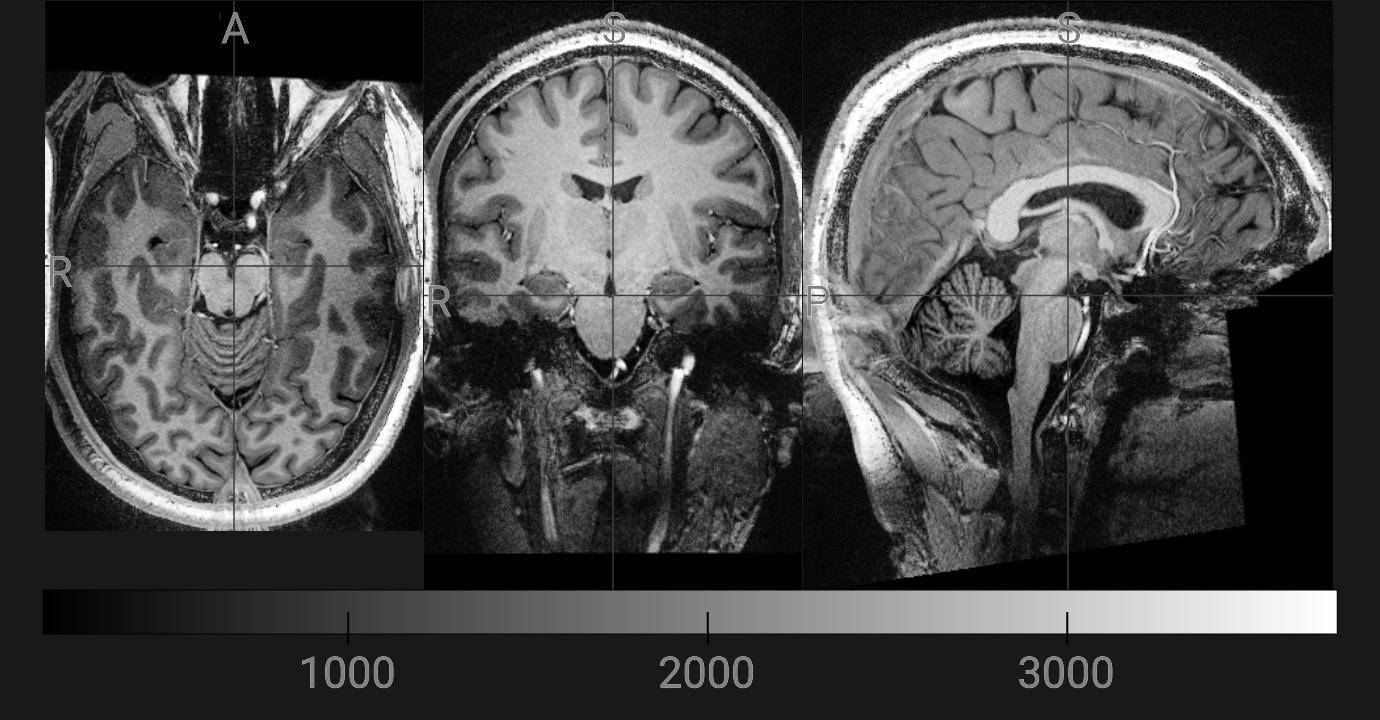

In [7]:
Image(filename='../../static/examples/structural_imaging/freesurfer_recon_all_clinical/recon_all_clinical_t1w.png')

# Run

<div style="
    border:2px solid #4CAF50; 
    border-radius:10px; 
    padding:15px; 
    background-color:#F0FFF0;
">

<h2 style="color:#2E7D32;">🧠 Automated Brain Scan Processing using recon-all clinical</h2>

<p style="color:#33691E;">
This step  <b style="color:#1565C0;">prepares our MRI data</b> so it can be processed automatically.  
Think of it like <i>setting up the folders and tools</i> before we start the real analysis.
</p>

<ul style="
    font-size:16px; 
    color:#33691E; 
    line-height:1.6; 
    list-style-type: disc; 
    padding-left: 25px; 
    list-style-position: inside;
">
  <li>✔️ <span style="color:#6A1B9A;">Creates a folder</span> where results will be saved</li>
  <li>✔️ <span style="color:#66BB6A;">Checks everything is ready</span> before running</li>
  <li>✔️ <b style="color:#4CAF50;">Run the command "recon-all-clinical.sh"</b></li>
</ul>

<p style="color:#33691E;">
<b>In plain words:</b> we are telling the computer:<br>
<i>"Here’s the scan. Put the results in this folder. Run the pipeline."</i>
</p>

<p style="color:#558B2F;">
⚠️ Don’t worry about the code details – they’re just making sure the computer behaves!
</p>

<hr style="border:1px dashed #81C784;">

<p style="color:#2E7D32; font-weight:bold; font-size:16px;">
➡️ When you are ready, hit <code>Command + Enter</code> (Mac) or <code>Control + Enter</code> (Windows/Linux),  
or press the ▶️ play button after clicking on the cell below.
</p>

</div>


In [8]:
%%bash
#--------------------------------------------
# FreeSurfer recon-all-clinical pipeline
#--------------------------------------------

set -euo pipefail  # Stop on unset variables or errors

#----------------------------
# Config
#----------------------------
INPUT_SCAN=./data/structural/mp2rage.nii.gz
SUBJECT_ID=TestSubject
THREADS=2 #adapt if more resources are available
SUBJECT_DIR=./data/structural/recon-all-clinical

# Ensure output folder exists
mkdir -p "$SUBJECT_DIR"
echo "SUBJECT_DIR=$SUBJECT_DIR"
echo "SUBJECT_ID=$SUBJECT_ID"
echo "INPUT_SCAN=$INPUT_SCAN"
echo

#----------------------------
# Allow deeper folder structures in some FreeSurfer builds
#----------------------------
export FS_ALLOW_DEEP=1
export SINGULARITYENV_FS_ALLOW_DEEP=1
export APPTAINERENV_FS_ALLOW_DEEP=1

#----------------------------
# Start pipeline
#----------------------------
# Remove previous "is-running" file if it exists
rm -f "$SUBJECT_DIR/$SUBJECT_ID/scripts/IsRunning.lh+rh"

# Run the actual recon-all-clinical pipeline
recon-all-clinical.sh "$INPUT_SCAN" "$SUBJECT_ID" "$THREADS" "$SUBJECT_DIR"

#----------------------------
# End message
#----------------------------
echo "----- recon-all-clinical.sh completed -----"
echo "Results saved to: $SUBJECT_DIR/$SUBJECT_ID"


SUBJECT_DIR=./data/structural/recon-all-clinical
SUBJECT_ID=TestSubject
INPUT_SCAN=./data/structural/mp2rage.nii.gz

#--------------------------------------------
#@# recon-all-clinical Fri Jan 16 11:31:55 AM UTC 2026
 
mri_convert ./data/structural/mp2rage.nii.gz /home/jovyan/Git_repositories/neurodeskedu/books/examples/structural_imaging/data/structural/recon-all-clinical/TestSubject/mri/native.mgz 
INFO: using NIfTI-1 sform (sform_code=1)
reading from ./data/structural/mp2rage.nii.gz...
TR=4310.00, TE=0.00, TI=0.00, flip angle=0.00
i_ras = (0.999815, -0.0191912, -0.00103917)
j_ras = (0.019201, 0.999761, 0.0104718)
k_ras = (0.000837961, -0.0104898, 0.999945)
writing to /home/jovyan/Git_repositories/neurodeskedu/books/examples/structural_imaging/data/structural/recon-all-clinical/TestSubject/mri/native.mgz...
 
SynthSeg-robust 2.0
using CPU, hiding all CUDA_VISIBLE_DEVICES
using 2 threads
addctab  True
predicting 1/1
1/1 [==============================] - 283s 283s/step

segmentation 

<div style="
    border:2px solid #9C27B0; 
    border-radius:10px; 
    padding:20px; 
    background-color: var(--jp-cell-bg0, #FAF5FF);
">

<h2 style="color:#9C27B0;">🎨 Viewing <code>aseg.mgz</code></h2>

<p style="color: var(--jp-ui-font-color0, #6A1B9A);">
Now we will open the <b style="color:#9C27B0;">aseg.mgz</b> file.  
This is FreeSurfer’s <b>automatic brain segmentation</b>, where different brain structures are given unique numbers and colors.
</p>

<ul style="
    font-size:16px; 
    line-height:1.6; 
    color: var(--jp-ui-font-color1, #4A148C); 
    list-style-type: disc; 
    padding-left: 25px; 
    list-style-position: inside;
">
  <li>📂 <code>aseg.mgz</code> = FreeSurfer’s anatomical segmentation file</li>
  <li>🎨 Each color = a different brain structure (e.g., hippocampus, ventricles, cortex)</li>
  <li>🧩 Helps us check if FreeSurfer labelled the brain correctly</li>
  <li>➕ Crosshairs line up the same spot across all views</li>
</ul>

<hr style="border:1px dashed var(--jp-border-color1, #BDBDBD);">

<p style="color: var(--jp-ui-font-color0, #4A148C); font-weight:bold; font-size:16px;">
➡️ Click the cell below, then press <code>Command + Enter</code> (Mac) or <code>Control + Enter</code> (Windows/Linux).  
This will open <code>aseg.mgz</code> in the viewer with FreeSurfer colors.
</p>

</div>


In [20]:
# Display aseg.mgz in FreeSurfer colors, labels 0–100
import tempfile, os
from pathlib import Path

ASEG_PATH = "./data/structural/recon-all-clinical/TestSubject/mri/aseg.mgz"
assert Path(ASEG_PATH).exists(), f"Missing aseg: {ASEG_PATH}"

aseg_img = nib.load(ASEG_PATH)
aseg = np.rint(aseg_img.get_fdata()).astype(np.int32)

# Keep only labels 0–100, everything else to 0
aseg = np.where((aseg >= 0) & (aseg <= 100), aseg, 0)

# Save temporary integer NIfTI
tmp_path = os.path.join(tempfile.gettempdir(), "aseg_fs_0to100.nii.gz")
nib.save(nib.Nifti1Image(aseg, aseg_img.affine, aseg_img.header), tmp_path)

# Viewer
nv = NiiVue(
    height=600,
    multiplanar_layout="GRID",
    multiplanar_show_render=True,
    is_colorbar=True,
    is_orient_cube=True,
    is_radiological_convention=True,
    back_color=(0.1, 0.1, 0.1, 1.0),
)

# Use FreeSurfer colormap
nv.add_volume({
    "path": tmp_path,
    "name": "aseg",
    "opacity": 1.0,
    "colormap": "freesurfer",
})

nv.set_crosshair_color([0,0,0,1])
display(nv)

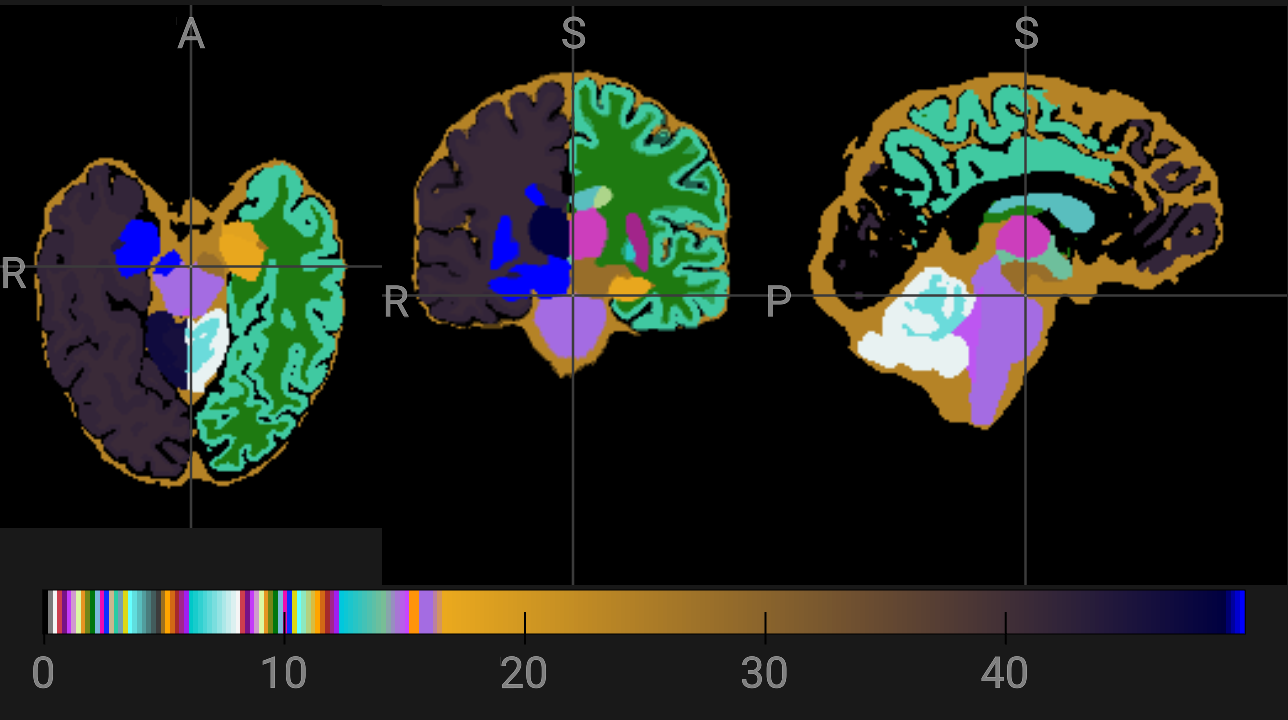

In [10]:
Image(filename='../../static/examples/structural_imaging/freesurfer_recon_all_clinical/recon_all_clinical_aseg.png')

<div style="
    border:2px solid #1976D2; 
    border-radius:10px; 
    padding:20px; 
    background-color: var(--jp-cell-bg0, #F0F8FF);
">

<h2 style="color:#1976D2;">Viewing the Pial Surfaces</h2>

<p style="color: var(--jp-ui-font-color0, #1565C0);">
Now we will look at the <b style="color:#1976D2;">pial surfaces</b>.  
These are '3D' models of the <b>outer surface of the brain</b> (the grey matter boundary).  
FreeSurfer creates one for each hemisphere.
</p>

<ul style="
    font-size:16px; 
    line-height:1.6; 
    color: var(--jp-ui-font-color1, #0D47A1); 
    list-style-type: disc; 
    padding-left: 25px; 
    list-style-position: inside;
">
  <li>📂 <code>lh.pial</code> = left hemisphere surface</li>
  <li>📂 <code>rh.pial</code> = right hemisphere surface</li>
  <li>🔴 Left hemisphere is shown in <b>red</b></li>
  <li>🔵 Right hemisphere is shown in <b>blue</b></li>
  <li>Displayed in a fully interactive 3D view (you can rotate and zoom)</li>
</ul>

<hr style="border:1px dashed var(--jp-border-color1, #BDBDBD);">

<p style="color: var(--jp-ui-font-color0, #1565C0); font-weight:bold; font-size:16px;">
➡️ Click the cell below, then press <code>Command + Enter</code> (Mac) or <code>Control + Enter</code> (Windows/Linux).  
You’ll see a 3D model of the brain surface – red for left, blue for right.
</p>

</div>


In [11]:
# Pial surfaces with explicit per-mesh color + shader (ipyniivue)
from ipyniivue import Mesh

SUBJECTS_DIR = "./data/structural/recon-all-clinical"
SUBJECT = "TestSubject"
surf_dir = Path(SUBJECTS_DIR) / SUBJECT / "surf"

lh = surf_dir / "lh.pial"
rh = surf_dir / "rh.pial"
assert lh.exists() and rh.exists(), "Missing pial surfaces"

nv = NiiVue(
    height=600,
    is_colorbar=False,
    is_orient_cube=True,
    is_radiological_convention=True,
    back_color=(0.05, 0.05, 0.05, 1.0),
)

# Use rgba255 (0..255 ints) — more reliable across builds than 0..1 floats
nv.add_mesh(Mesh(path=str(lh), name="lh.pial", rgba255=[255, 90, 90, 255], opacity=1.0))
nv.add_mesh(Mesh(path=str(rh), name="rh.pial", rgba255=[90, 90, 255, 255], opacity=1.0))


display(nv)

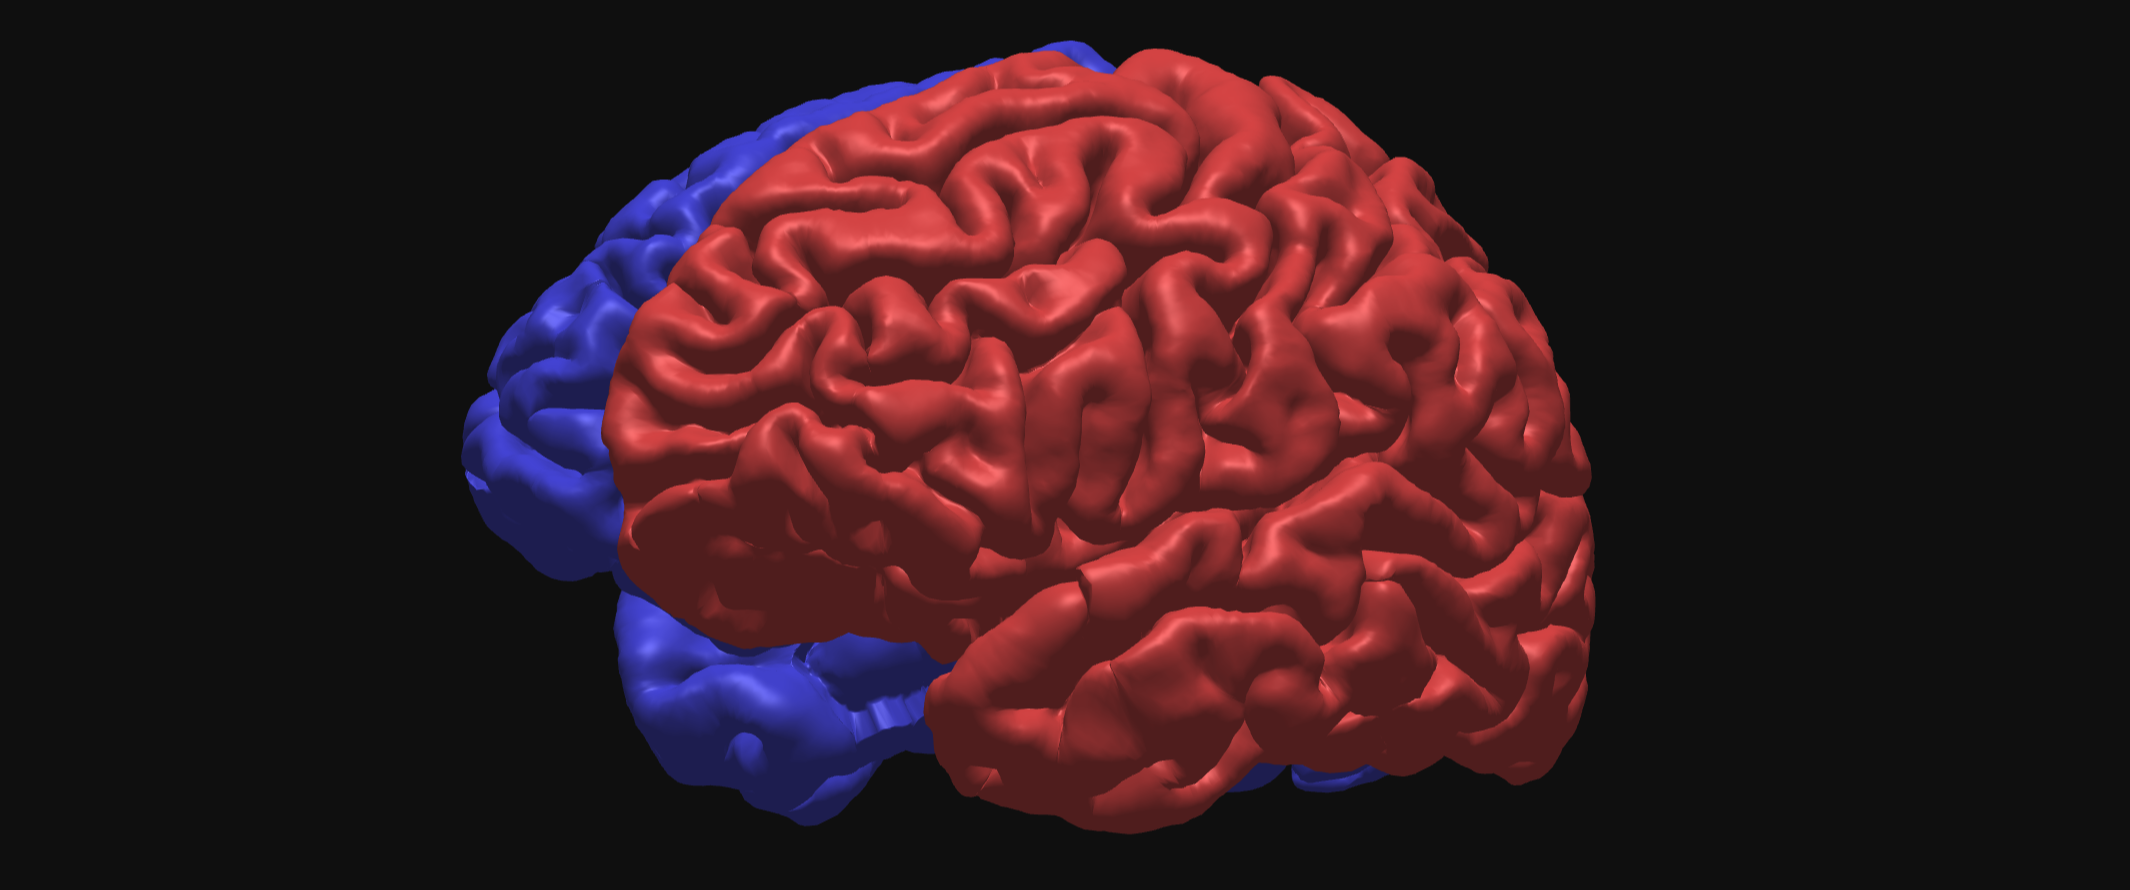

In [12]:
Image(filename='../../static/examples/structural_imaging/freesurfer_recon_all_clinical/recon_all_clinical_pial_surface.png')

<div style="
    border:2px solid #00897B; 
    border-radius:10px; 
    padding:20px; 
    background-color: var(--jp-cell-bg0, #F0FFFC);
">

<h2 style="color:#00897B;">⚪ Viewing the White Matter Surfaces</h2>

<p style="color: var(--jp-ui-font-color0, #00695C);">
Now we will open the <b style="color:#00897B;">white matter surfaces</b>.  
These are 3D models of the <b>inner boundary of the cortex</b>, where the grey matter meets the white matter.  
They are used by FreeSurfer to measure cortical thickness.
</p>

<ul style="
    font-size:16px; 
    line-height:1.6; 
    color: var(--jp-ui-font-color1, #00695C); 
    list-style-type: disc; 
    padding-left: 25px; 
    list-style-position: inside;
">
  <li>📂 <code>lh.white</code> = left hemisphere white surface</li>
  <li>📂 <code>rh.white</code> = right hemisphere white surface</li>
  <li>🟠 Left hemisphere is shown in <b>orange</b></li>
  <li>🔵 Right hemisphere is shown in <b>light blue</b></li>
  <li>🌐 Fully interactive 3D display – rotate and zoom to explore</li>
</ul>

<hr style="border:1px dashed var(--jp-border-color1, #BDBDBD);">

<p style="color: var(--jp-ui-font-color0, #00695C); font-weight:bold; font-size:16px;">
➡️ Click the cell below, then press <code>Command + Enter</code> (Mac) or <code>Control + Enter</code> (Windows/Linux).  
You’ll see the <b>white matter surfaces</b> in 3D (orange = left, blue = right).
</p>

</div>


In [13]:
# White surfaces (lh/rh) with solid colors

lh = surf_dir/"lh.white"; rh = surf_dir/"rh.white"
assert lh.exists() and rh.exists(), "Missing white surfaces"

nv = NiiVue(height=600,is_colorbar=False, is_orient_cube=True, 
            is_radiological_convention=True, back_color=(0.05,0.05,0.05,1.0))

nv.add_mesh(Mesh(path=str(lh), name="lh.white", rgba255=[255,200,90,255], opacity=1.0))
nv.add_mesh(Mesh(path=str(rh), name="rh.white", rgba255=[90,200,255,255],  opacity=1.0))

display(nv)

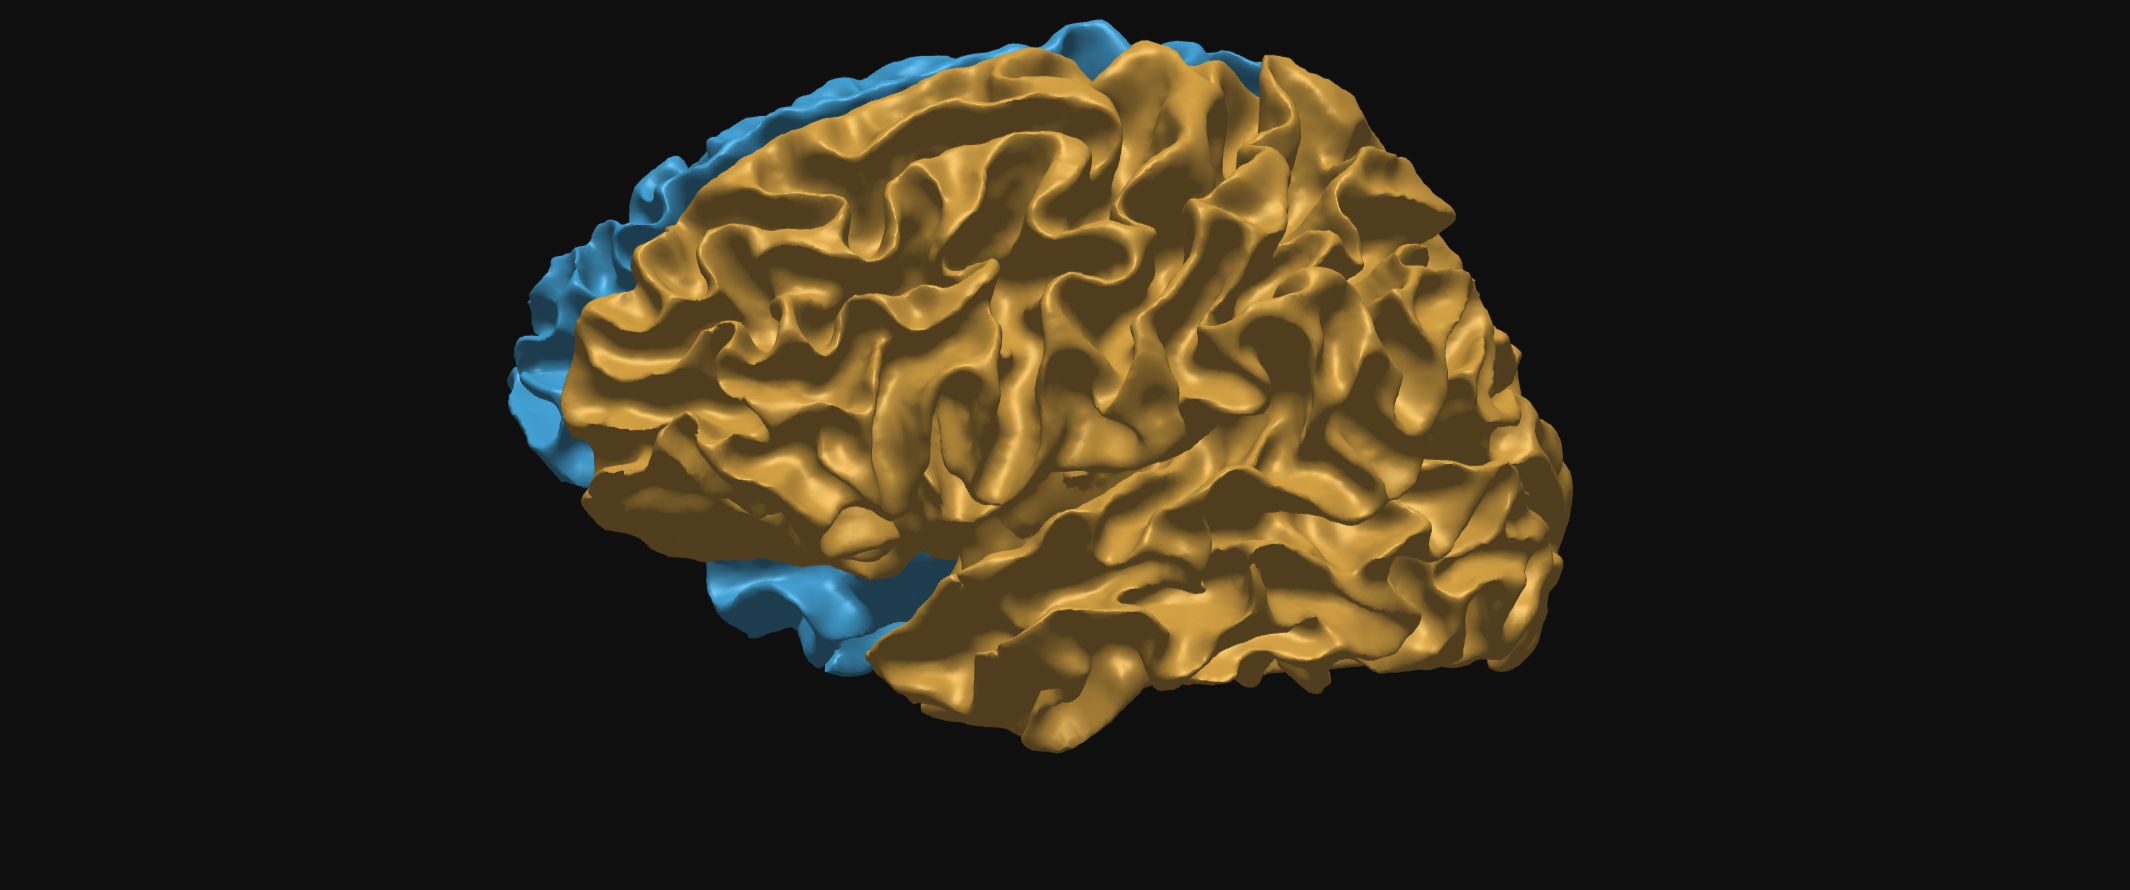

In [14]:
Image(filename='../../static/examples/structural_imaging/freesurfer_recon_all_clinical/recon_all_clinical_white_matter.png')

<div style="
    border:2px solid #FF7043; 
    border-radius:10px; 
    padding:20px; 
    background-color: var(--jp-cell-bg0, #FFF8F5);
">

<h2 style="color:#FF7043;">🌐 Viewing the Inflated Surface</h2>

<p style="color: var(--jp-ui-font-color0, #E64A19);">
Now we will look at the <b style="color:#D84315;">inflated brain surface</b>.  
This is a special 3D model where the folds (sulci and gyri) are <b>“smoothed out”</b> so the entire cortex can be seen more clearly.  
It is very useful for visualising activity maps or large-scale anatomy without folds hiding important areas.
</p>

<ul style="
    font-size:16px; 
    line-height:1.6; 
    color: var(--jp-ui-font-color1, #D84315); 
    list-style-type: disc; 
    padding-left: 25px; 
    list-style-position: inside;
">
  <li>📂 <code>lh.inflated</code> = inflated left hemisphere surface</li>
  <li>🔴 Left hemisphere is shown here in <b>light red</b></li>
  <li>👁️ The sulci (valleys) are expanded so you can see regions that are normally hidden inside folds</li>
  <li>🌐 Fully interactive 3D view – rotate and zoom to explore the cortical sheet</li>
</ul>

<hr style="border:1px dashed var(--jp-border-color1, #BDBDBD);">

<p style="color: var(--jp-ui-font-color0, #E64A19); font-weight:bold; font-size:16px;">
➡️ Click the cell below, then press <code>Command + Enter</code> (Mac) or <code>Control + Enter</code> (Windows/Linux).  
You’ll see the <b>inflated left hemisphere</b> in 3D.
</p>

</div>


In [15]:
# Inflated surfaces (lh/rh) with solid colors

lh = surf_dir/"lh.inflated"; rh = surf_dir/"rh.inflated"
assert lh.exists() and rh.exists(), "Missing inflated surfaces"

nv = NiiVue(height=600, is_colorbar=False, is_orient_cube=True, 
            is_radiological_convention=True, back_color=(0.05,0.05,0.05,1.0))

nv.add_mesh(Mesh(path=str(lh), name="lh.inflated", rgba255=[255,140,140,255], opacity=1.0))
#nv.add_mesh(Mesh(path=str(rh), name="rh.inflated", rgba255=[140,140,255,255], opacity=1.0))

display(nv)

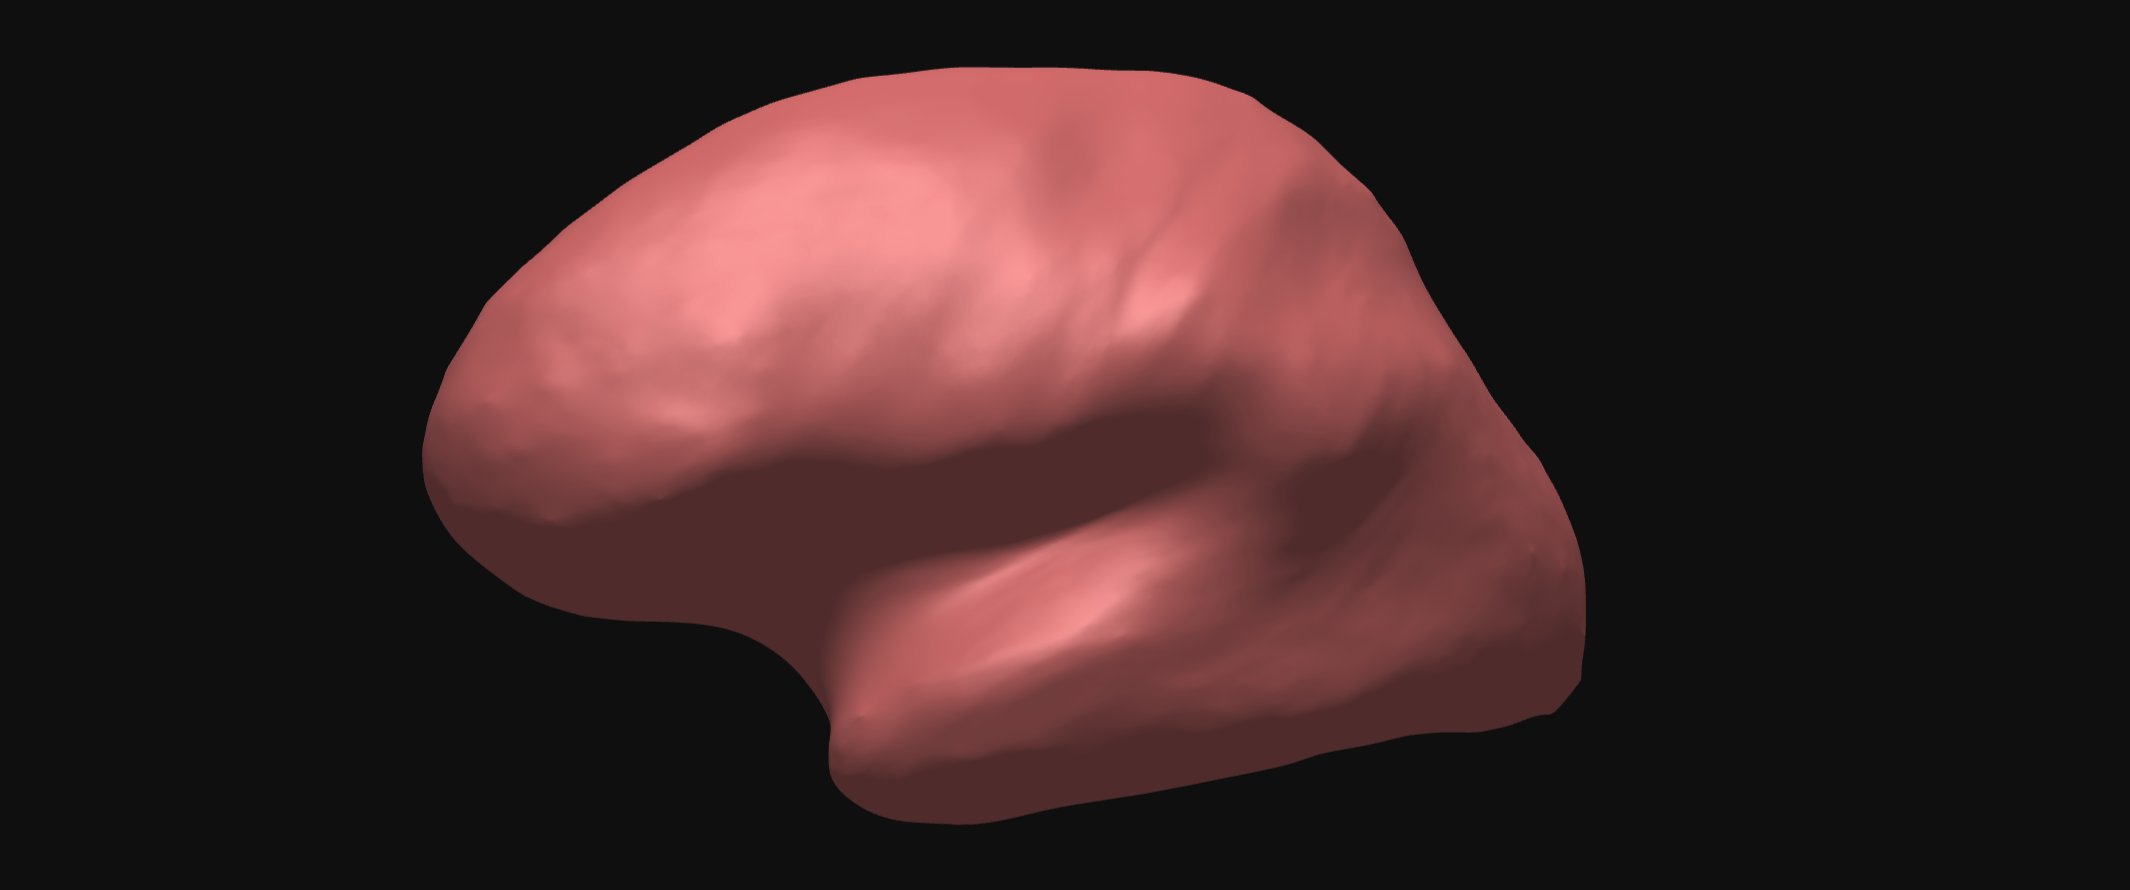

In [16]:
Image(filename='../../static/examples/structural_imaging/freesurfer_recon_all_clinical/recon_all_clinical_inflated.png')

<div style="
    border:2px solid #5C6BC0; 
    border-radius:12px; 
    padding:16px; 
    background-color: var(--jp-cell-bg0, #F7F9FF);
">

  <!-- Main heading -->
  <h2 style="color:#5C6BC0; margin-top:0;">🗂️ Inspecting the Subject Folder & Logs</h2>

  <p style="color: var(--jp-ui-font-color0, #3949AB);">
    This step shows the <b>top-level contents</b> of the subject’s FreeSurfer folder and the <b>run logs</b>.  
    Use it to confirm that key outputs exist and to find logs if something went wrong.
  </p>

  <!-- Code block -->
  <div style="
      margin:10px 0 14px 0; 
      padding:10px; 
      background-color: var(--jp-code-bg0, #EEF1FF); 
      border:1px solid var(--jp-border-color1, #C5CAE9); 
      border-radius:8px;
  ">
    <pre style="margin:0; font-size:14px; color: var(--jp-code-font-color0, #1B5E20);">
SUBJECTS_DIR = ./data/structural/recon-all-clinical
SUBJECT     = TestSubject
Path        = ./data/structural/recon-all-clinical/TestSubject
    </pre>
  </div>

  <!-- Subheading -->
  <h3 style="color:#5C6BC0; margin-bottom:8px;">📁 What the main folders mean</h3>

  <!-- Folder table -->
  <table style="
      border-collapse:collapse; 
      width:100%; 
      font-size:15px;
      color: var(--jp-ui-font-color0, #3949AB);
  ">
    <thead>
      <tr>
        <th style="text-align:left; border-bottom:2px solid var(--jp-border-color1, #C5CAE9); padding:6px;">Folder</th>
        <th style="text-align:left; border-bottom:2px solid var(--jp-border-color1, #C5CAE9); padding:6px;">Purpose</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="padding:6px; border-bottom:1px solid var(--jp-border-color1, #E8EAF6);"><code>mri/</code></td>
        <td style="padding:6px; border-bottom:1px solid var(--jp-border-color1, #E8EAF6);">All volumetric outputs (<code>.mgz</code>), e.g. <code>native.mgz</code>, <code>aseg.mgz</code></td>
      </tr>
      <tr>
        <td style="padding:6px; border-bottom:1px solid var(--jp-border-color1, #E8EAF6);"><code>surf/</code></td>
        <td style="padding:6px; border-bottom:1px solid var(--jp-border-color1, #E8EAF6);">Cortical meshes (<code>.white</code>, <code>.pial</code>, <code>.inflated</code>) and annotations (<code>.annot</code>)</td>
      </tr>
      <tr>
        <td style="padding:6px; border-bottom:1px solid var(--jp-border-color1, #E8EAF6);"><code>label/</code></td>
        <td style="padding:6px; border-bottom:1px solid var(--jp-border-color1, #E8EAF6);">Region labels and color tables (<code>.ctab</code>)</td>
      </tr>
      <tr>
        <td style="padding:6px; border-bottom:1px solid var(--jp-border-color1, #E8EAF6);"><code>stats/</code></td>
        <td style="padding:6px; border-bottom:1px solid var(--jp-border-color1, #E8EAF6);">Per-region thickness/surface area stats (for group analysis)</td>
      </tr>
      <tr>
        <td style="padding:6px; border-bottom:1px solid var(--jp-border-color1, #E8EAF6);"><code>scripts/</code></td>
        <td style="padding:6px; border-bottom:1px solid var(--jp-border-color1, #E8EAF6);">Run logs, <code>IsRunning</code> flags, and command histories</td>
      </tr>
    </tbody>
  </table>

  <!-- Tip box -->
  <div style="
      margin-top:14px; 
      padding:10px; 
      background-color: var(--jp-warn-bg, #FFF8E1); 
      border:1px solid var(--jp-warn-border, #FFE082); 
      border-radius:8px;
  ">
    <b style="color:#E65100;">Tip:</b> If a run crashes or stalls, check <code>scripts/</code> for recent log files and any <code>IsRunning*</code> flags.
  </div>

  <hr style="border:none; border-top:1px dashed var(--jp-border-color1, #C5CAE9); margin:16px 0;">

  <p style="color: var(--jp-ui-font-color0, #3949AB); font-weight:600;">
    ➡️ Click the cell below, then press <code>Command + Enter</code> (Mac) or <code>Control + Enter</code> (Windows/Linux) to list the directory tree and show log files.
  </p>

</div>


In [17]:
# Show directory layout and recon logs
import os, subprocess, textwrap

SUBJECTS_DIR = "./data/structural/recon-all-clinical"
SUBJECT = "TestSubject"
base = f"{SUBJECTS_DIR}/{SUBJECT}"

print("=== Subject directory tree (top) ===")
subprocess.run(["bash","-lc", f'ls -lh {base}'])
print("\n=== Logs/scripts ===")
scripts = f"{base}/scripts"
subprocess.run(["bash","-lc", f'ls -lh {scripts} 2>/dev/null || true'])

notes = [
    ("mri/", "All volumetric outputs (.mgz)."),
    ("surf/", "Cortical meshes and annotation files (.white, .pial, .inflated, .annot)."),
    ("label/", "Labels, annotation tables (.ctab), region lists."),
    ("stats/", "Cortex thickness/surface area stats per region (for group analysis)."),
    ("scripts/", "Run logs, IsRunning flags, and command histories."),
]
for d, t in notes:
    print(f"{d:12s} {t}")

=== Subject directory tree (top) ===
total 32K
drwxr-sr-x 2 jovyan users 4.0K Jan 16 13:21 label
drwxr-sr-x 3 jovyan users 4.0K Jan 16 13:12 mri
drwxr-sr-x 2 jovyan users 4.0K Jan 16 13:21 scripts
drwxr-sr-x 2 jovyan users 4.0K Jan 16 13:21 stats
drwxr-sr-x 2 jovyan users 4.0K Jan 16 13:00 surf
drwxr-sr-x 2 jovyan users 4.0K Jan 16 11:31 tmp
drwxr-sr-x 2 jovyan users 4.0K Jan 16 11:31 touch
drwxr-sr-x 2 jovyan users 4.0K Jan 16 11:31 trash

=== Logs/scripts ===
total 364K
-rw-r--r-- 1 jovyan users 358K Jan 16 13:21 recon-all-clinical.log
mri/         All volumetric outputs (.mgz).
surf/        Cortical meshes and annotation files (.white, .pial, .inflated, .annot).
label/       Labels, annotation tables (.ctab), region lists.
stats/       Cortex thickness/surface area stats per region (for group analysis).
scripts/     Run logs, IsRunning flags, and command histories.


#### Dependencies in Jupyter/Python
- Using the package [watermark](https://github.com/rasbt/watermark) to document system environment and software versions used in this notebook

In [21]:
%load_ext watermark

%watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2026-01-16T13:36:09.599228+00:00

Python implementation: CPython
Python version       : 3.13.9
IPython version      : 9.7.0

Compiler    : GCC 14.3.0
OS          : Linux
Release     : 5.15.0-164-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 32
Architecture: 64bit

IPython  : 9.7.0
ipyniivue: 2.4.4
nibabel  : 5.3.2
numpy    : 1.26.4

